In [1]:
import numpy as np
import math as m
import random
import cmath as c
from numpy.linalg import inv
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
num_of_zeros=[]
for i in range(7):
    num_of_zeros.append(i*10)

## DFT & IDFT

In [3]:
def DFT(x,N):
    W=c.exp(((-2*m.pi)/N)*1J)
    D=[]
    for i in range(N):
        d=[]
        for j in range(N):
            d.append(W**(i*j))
        D.append(d)
    X=np.matmul(D,x)
    return X

In [4]:
def IDFT(X,N):
    W1=c.exp(((2*m.pi)/N)*1j)
    D1=[]
    for i in range(N):
        d1=[]
        for j in range(N):
            d1.append(W1**(i*j))
        D1.append(d1)
    x=np.matmul(D1,X)
    N=len(X)
    x=np.divide(x,N)
    return x

## DCT & IDCT

In [5]:
def DCT(x,N):
    D1=[]
    for k in range(N):
        d=[]
        for n in range(N):
            d.append(np.cos(((m.pi)*k*(2*n+1))/(2*N)))
        D1.append(d)
    X1=np.matmul(D1,x)
    X1=np.multiply(X1,2)
    return X1

In [6]:
def IDCT(X1,N):
    D=[]
    for n in range(N):
        d=[]
        for k in range(N):
            d.append(np.cos(((m.pi)*k*(2*n+1))/(2*N)))
        D.append(d)
    X=[]
    a=[]
    a.append(0.5)
    for i in range(N-1):
        a.append(1)
    for i in range(N):
        X.append(X1[i]*a[i])
    x=np.matmul(D,X)
    x=np.divide(x,N)
    return x

## Haar Transform

In [7]:
def Haar_Matrix(n):
    n = 2**np.ceil(np.log2(n))
    if n > 2:
        h = Haar_Matrix(n / 2)
    else:
        return np.array([[1, 1], [1, -1]])

    h_n = np.kron(h, [1, 1])
    h_i = np.sqrt(n/2)*np.kron(np.eye(len(h)), [1, -1])
    h = np.vstack((h_n, h_i))
    return h

In [8]:
def HT(N,x):
    H=Haar_Matrix(N)
    X=np.matmul(H,x)
    return X

In [9]:
def IHT(N,X):
    H=Haar_Matrix(N)
    x=np.matmul(inv(H),X)
    return x

In [10]:
#For DFT
def X_DFT(X,k):
    Xnew=[]
    N=len(list(X))
    for i in range(N):
        if i<=int((N-1-k)/2):
            Xnew.append(X[i])
        elif i>=int((N+1-k)/2) and i<=int((N-1+k)/2):
            Xnew.append(0)
        elif i>=int((N+1+k)/2) and i<=N-1:
            Xnew.append(X[i])
    return Xnew

In [11]:
#For DCT
def X_DCT(X,k):
    Xnew=[]
    N=len(X) 
    for i in range(N):
        if i<=(N-1-k):
            Xnew.append(X[i])
        else:
            Xnew.append(0)
    return Xnew

In [12]:
#For Haar
def X_Haar(X,k):
    N=len(list(X))
    Xnew=[]
    for i in range(N):
        if i<=(N-1-k):
            Xnew.append(X[i])
        else:
            Xnew.append(0)
    return Xnew

In [13]:
def Error(x,y):
    x=np.array(x)
    y=np.array(y)
    error=np.mean(abs(x-y)**2)
    return error

In [14]:
N=64
E1=[]
E2=[]
E3=[]
x=[]
for i in range(N):
    x.append(random.uniform(0,1)) 

Z=5
for i in range(7):
    X1=DFT(x,N)
    e=0
    for z in range(Z):
        k=num_of_zeros[i]
        x_DFT=X_DFT(list(X1),k)
        x1=IDFT(x_DFT,N)
        e+=Error(x,x1)
    E1.append(e/Z)

    X2=DCT(x,N)
    e=0
    for z in range(Z):
        k=num_of_zeros[i]
        x_DCT=X_DCT(list(X2),k)
        x2=IDCT(x_DCT,N)
        e+=Error(x,x2)
    E2.append(e/Z)

    X3=HT(N,x)
    e=0
    for z in range(Z):
        k=num_of_zeros[i]
        x_Haar=X_Haar(list(X3),k)
        x3=IHT(N,x_Haar)
        e+=Error(x,x3)
    E3.append(e/Z)

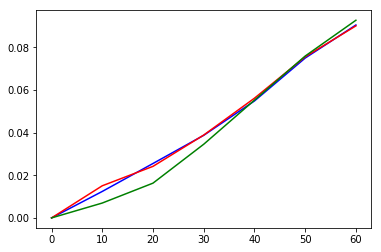

In [15]:
plt.plot(num_of_zeros,E1,'-b')
plt.plot(num_of_zeros,E2,'-r')
plt.plot(num_of_zeros,E3,'-g')